## Coletando os dados


In [53]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
# lista do caminho dos arquivos em formato csv
arquivos_csv = [
    r'D:\Projetos\Analise_dados_PRF_acidentes\files\acidentes2020.csv',
    r'D:\Projetos\Analise_dados_PRF_acidentes\files\acidentes2021.csv', 
    r'D:\Projetos\Analise_dados_PRF_acidentes\files\acidentes2022.csv',
    r'D:\Projetos\Analise_dados_PRF_acidentes\files\acidentes2023.csv'
]

In [55]:
# lista de arquivos armazenados
dfs = []

#lê cada arquivo e inclui na lista dfs
for arquivo in arquivos_csv:
    df = pd.read_csv(arquivo, delimiter=';', encoding='ISO-8859-1')
    dfs.append(df)



In [56]:
# concatena os arquivos da lista dfs
df_final = pd.concat(dfs, axis=0, ignore_index=True)

In [57]:
df_final.shape

(576136, 35)

### Criação do Metadados

In [58]:
def generate_metadata(dataframe):
    """
    Gera um dataframe contendo metadados das colunas do dataframe fornecido.

    :param dataframe: DataFrame para o qual os metadados serão gerados.
    :return: DataFrame contendo metadados.
    """

    # Coleta de metadados básicos
    metadata = pd.DataFrame({
        'nome_variavel': dataframe.columns,
        'tipo': dataframe.dtypes,
        'qt_nulos': dataframe.isnull().sum(),
        'percent_nulos': round((dataframe.isnull().sum() / len(dataframe))* 100 ,2),
        'cardinalidade': dataframe.nunique(),
    })
    metadata=metadata.sort_values(by='tipo')
    metadata = metadata.reset_index(drop=True)# reseta o indice do DataFrame e apaga o índice antigo

    return metadata

In [59]:
generate_metadata(df_final)

,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade
0,feridos_leves,int64,0,0.00,2
1,ilesos,int64,0,0.00,2
2,feridos_graves,int64,0,0.00,2
3,mortos,int64,0,0.00,2
4,id_veiculo,int64,0,0.00,400417
5,br,float64,1726,0.30,122
6,pesid,float64,4,0.00,576132
7,idade,float64,57598,10.00,173
8,ano_fabricacao_veiculo,float64,38930,6.76,70
9,id,float64,0,0.00,242355


### Filtrando os dados para o bojetivo do projeto


In [60]:
# criando um novo df com o filtro de apenas pessoas que morreram
df_obt = df_final.loc[(df_final['mortos']==1)]

In [61]:
df_obt.shape

(20249, 35)

In [62]:
generate_metadata(df_obt)

,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade
0,feridos_leves,int64,0,0.00,1
1,ilesos,int64,0,0.00,1
2,feridos_graves,int64,0,0.00,1
3,mortos,int64,0,0.00,1
4,id_veiculo,int64,0,0.00,17803
5,br,float64,15,0.07,110
6,pesid,float64,0,0.00,20249
7,idade,float64,1106,5.46,105
8,ano_fabricacao_veiculo,float64,2255,11.14,64
9,id,float64,0,0.00,17421


## Tratamento dos dados

Nesse fase será feita a limpeza dos dados para iniciar a análise descritiva

### Eliminação de colunas 

Após o filtro na coluna "mortos" podemos eliminar algumas colunas que ficaram redundantes e também algumas que a princípio não serão utilizadas na análise

In [63]:
colunas_drop = ['feridos_leves', 'ilesos', 'feridos_graves', 'mortos',
                'estado_fisico', 'classificacao_acidente', 'marca',
                'ano_fabricacao_veiculo', 'uop', 'delegacia' ]

In [64]:
# removendo a lista de colunas selecionadas
df_obt = df_obt.drop(columns=colunas_drop)

In [65]:
df_obt.shape

(20249, 25)

In [92]:
generate_metadata(df_obt)

,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade
0,id,float64,0,0.0,17421
1,pesid,float64,0,0.0,20249
2,data_inversa,datetime64[ns],0,0.0,1369
3,horario,datetime64[ns],0,0.0,996
4,id_veiculo,int64,0,0.0,17803
5,idade,float64,0,0.0,106
6,latitude,object,0,0.0,15774
7,sexo,object,0,0.0,3
8,tipo_envolvido,object,0,0.0,4
9,tipo_veiculo,object,0,0.0,22


In [90]:
df_obt.describe()

,id,pesid,data_inversa,horario,id_veiculo,idade
count,20249.000000,2.024900e+04,20249,20249,20249.000000,20249.000000
mean,407010.229592,8.978628e+05,2021-11-27 19:04:56.725764352,1900-01-01 13:31:08.619684608,724202.078671,41.467638
min,260036.000000,5.786340e+05,2020-01-01 00:00:00,1900-01-01 00:00:00,464131.000000,0.000000
25%,330222.000000,7.345680e+05,2020-12-20 00:00:00,1900-01-01 07:15:00,592578.000000,29.000000
50%,400123.000000,8.944870e+05,2021-11-28 00:00:00,1900-01-01 15:00:00,725088.000000,41.000000
75%,485215.000000,1.054379e+06,2022-10-29 00:00:00,1900-01-01 19:20:00,851496.000000,51.000000
max,554938.000000,1.226987e+06,2023-09-30 00:00:00,1900-01-01 23:59:00,985828.000000,1947.000000
std,86501.764324,1.844939e+05,NaN,NaN,148794.818636,24.894348


### Análise dos tipos de dados

In [82]:
# Alterando a coluna data_inversa para o tipo datetime
df_obt['data_inversa'] = pd.to_datetime(df_obt['data_inversa'])

In [84]:
# Alterando a coluna horario para o tipo datetime
df_obt['horario'] = pd.to_datetime(df_obt['horario'], format = '%H:%M:%S')

In [85]:
# Alterando a coluna br para o tipo object
df_obt['br'] = df_obt['br'].astype(object)

### Análise dos valores Nulos

In [86]:
# Como a diferença não é significativa para a variável idade, os valores nulos serão preenchidos com a média.
# Nas colunas 'km' e 'br' os valores nulos serão preenchidos com 'Não informado'
replace = {
    'br' : 'Desconhecido',
    'km' : 'Desconhecido',
    'idade' : df_obt['idade'].mean()
}
df_obt.fillna(value=replace, inplace=True)

## Análise Descritiva

Text(0.5, 1.0, 'Quantidade de mortes por Mês')

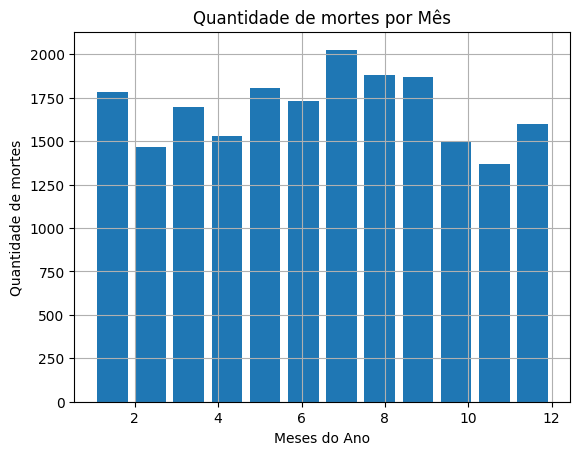

In [103]:
df_obt['data_inversa'].dt.month.hist(rwidth=.8, bins= 12)
plt.xlabel('Meses do Ano')
plt.ylabel('Quantidade de mortes')
plt.title('Quantidade de mortes por Mês')

Observando o histograma de mortes ao longo dos meses, é possível observar um ligeiro aumento no período de férias no meio do ano, sendo Julho o mês com mais mortes causadas por acidentes de trânsito.

Text(0.5, 1.0, 'Quantidade de mortes por Hora')

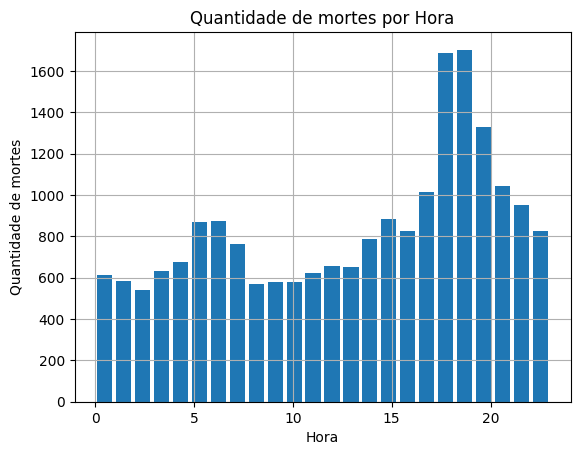

In [106]:
df_obt['horario'].dt.hour.hist(rwidth=.8, bins= 24)
plt.xlabel('Hora')
plt.ylabel('Quantidade de mortes')
plt.title('Quantidade de mortes por Hora')

É possível observar que o horário de pico noturno tem um aumento significativo de mortes

In [105]:
df_obt['horario'].dt.hour.value_counts()

horario
19    1702
18    1687
20    1327
21    1043
17    1014
22     949
15     882
6      872
5      870
16     825
23     825
14     786
7      762
4      675
12     658
13     649
3      634
11     621
0      613
1      584
9      581
10     578
8      571
2      541
Name: count, dtype: int64

<Axes: >

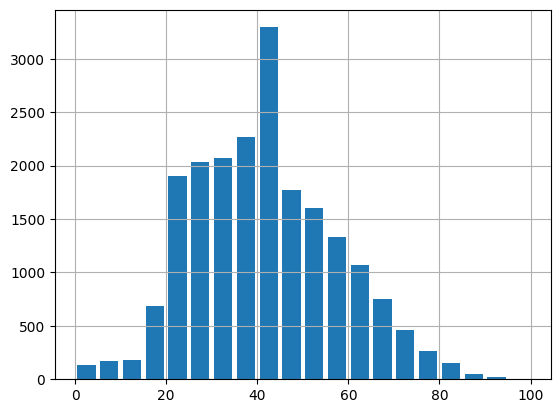

In [112]:
df_obt['idade'].hist(rwidth=.8, bins=np.arange(0,101,5))

In [111]:
df_obt['idade'].value_counts()

idade
41.467638      1106
36.000000       482
40.000000       458
38.000000       455
26.000000       451
               ... 
1947.000000       1
911.000000        1
949.000000        1
123.000000        1
99.000000         1
Name: count, Length: 106, dtype: int64

In [189]:
#gráfico completo com a porcentagem

def graf(dataframe, columns, head = 10, xlabelrotation = 90, graficos_por_linha=2):

    """
    Plota um conjunto de gráficos de barras, um gráfico para elemento fornecido pelo parâmetro columns.
    :param dataframe => DataFrame ao qual serão gerados os gráficos
    :columns => lista de colunas ou variáveis que serão criados os gráficos
    :head => quantidade de elementos de cada columns que será exibido nos gráficos
    :figsize => tamanho da figura como um todo
    :xlabelrotation => a rotação do label no eixo X

    """

    n = len(columns) # Número de colunas
    sqrt_n = np.sqrt(n) # Raiz quadrada de n

    # Calcula o número de linhas e colunas para os subplots
    num_rows = -(-len(columns) // graficos_por_linha) 
    num_cols = min(len(columns), graficos_por_linha) 

    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, 6 * num_rows)) # Cria uma figura com subplots

    for i, coluna in enumerate(columns):
        row = i // num_cols # Índice da linha do subplot
        col = i % num_cols # Índice da coluna do subplot

        x = dataframe[coluna].value_counts().head(head)
        total = len(dataframe[coluna]) # Total de todos os valores da coluna
        # total = x.sum() # Total de contagens para calcular as porcentagens

        bars = x.plot(kind='bar', ax=axs[row, col]) # Guarda as barras do gráfico
        axs[row, col].set_ylim(0, max(df_obt[coluna].value_counts().head(head)) * 1.1)  # Ajusta a altura da barra. útil para enquadrar a porcentagem sobre as barras
        axs[row, col].grid(axis='y', linestyle='--', alpha=0.6)
        axs[row, col].set_title(coluna)
        axs[row, col].set_xticklabels(axs[row, col].get_xticklabels(), rotation=0)

        # Adiciona as porcentagens dentro das barras
        for bar in bars.patches:
            yval = bar.get_height()
            percent = yval / total * 100
            axs[row, col].text(bar.get_x() + bar.get_width() / 2, yval -0.3,
                               f'{percent:.1f}%', ha='center', va='bottom')

        axs[row, col].set_title(coluna) # Define o título do gráfico
        # Rotaciona os rótulos do eixo x em 45 graus
        axs[row, col].set_xticklabels(axs[row, col].get_xticklabels(), rotation=xlabelrotation)

    #plt.subplots_adjust(hspace=1.0) # Ajusta o espaçamento vertical entre os subplots
    plt.tight_layout() # Ajusta o layout para evitar sobreposição
    plt.show() # Mostra os gráficos


In [114]:
df_obt.columns

Index(['id', 'pesid', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br',
       'km', 'municipio', 'causa_acidente', 'tipo_acidente', 'fase_dia',
       'sentido_via', 'condicao_metereologica', 'tipo_pista', 'tracado_via',
       'uso_solo', 'id_veiculo', 'tipo_veiculo', 'tipo_envolvido', 'idade',
       'sexo', 'latitude', 'longitude', 'regional'],
      dtype='object')

In [123]:
columns_grafBarras = ['br','uf', 'municipio', 'causa_acidente', 'tipo_acidente', 'fase_dia',
       'sentido_via', 'condicao_metereologica', 'tipo_pista', 'tracado_via',
       'uso_solo','tipo_veiculo', 'tipo_envolvido', 'sexo']

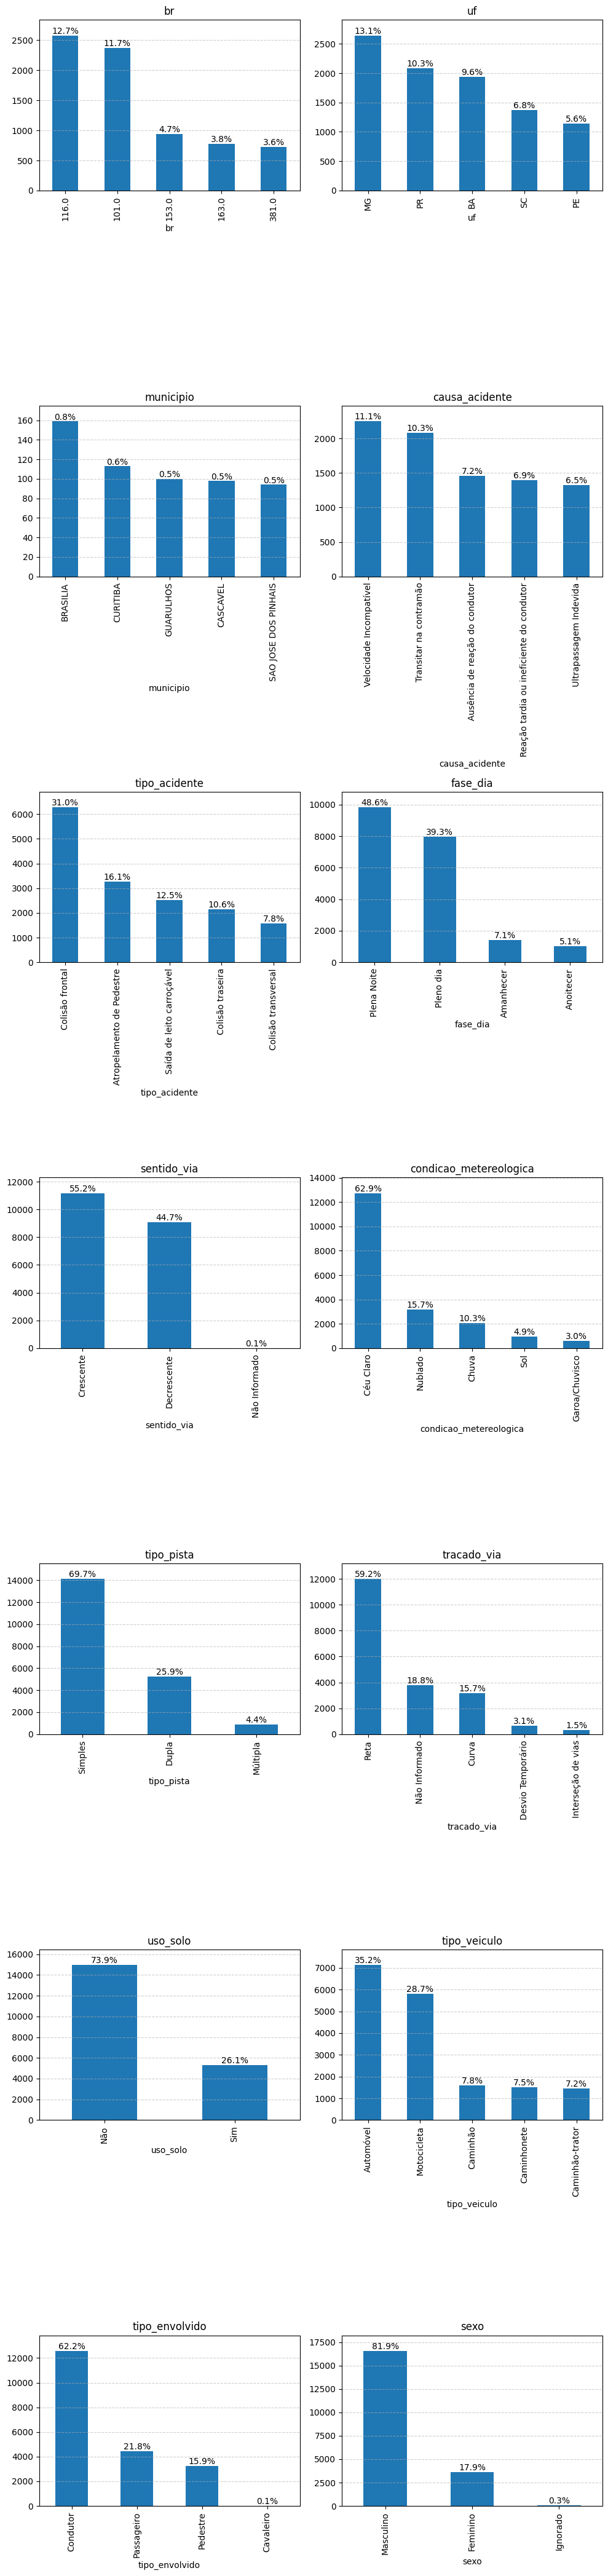

In [190]:
graf(df_obt, columns_grafBarras, head = 5,  xlabelrotation = 90)